In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Individual Project Report

#### Reading the Datasets into R

In [5]:
players = read_csv("players.csv")
sessions = read_csv("sessions.csv")
players
sessions 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


<font color = blue> <h4>Sessions Dataset Description: </h4></font>
- There are 1535 observations which means there were 1535 sessions played. 
- There are 5 variables (columns) which are hashedEmail (the session player's encrypted email), start_time, end_time, original_start_time, original_end_time.
- The start_time and end_time variables gives the time as a date, while the original_start_time and original_end_time variables give the time in military time (milliseconds after Jan 1, 1970)
- The hashedEmail, start_time, and end_time variables are of type character.
- The original_start_time, and original_end_time variables are numerical (double).
- The data seems to be collected from the Minecraft server's history.
- Using this data, there is no way to prove if people were active during sessions so some sessions could have been spent in idle.
  

<font color = blue> <h4> Players Dataset Description: </h4></font>
- There are 196 observations in this dataset which means this dataset contains data on 196 players in total
- There are 7 variables (columns): experience, subscribe (whether or not someone is subscribed to a game-related newsletter), hashedEmail (a string of characters representing an encrypted email), played_hours (the amount of time a player played in hours), name, gender, Age (a player's age in years).
- The variables experience, hashedEmail, name, gender are of the character data type.
- The played_hours and Age data types are numerical (double data type).
- The subscribe variable is a logical type (either TRUE, FALSE, or NA).
- The players data seem to have been collected via a survey or something of the sort as there is missing data and in the gender column there is a placeholder of "Prefer not to say".
- The players missing data may lead to errors with predictions.
- The data is also imbalanced as most people have less than 10 hours played and only a few have 20+ hours played which could affect prediction models.
- The average age of players is 21.14 years old.
- The average hours played by a player is 5.85 hours.
 


### Question: Can player played_hours, age and experience, predict whether or not they are subscribed? 

In [6]:
averages <- players |> summarise(avg_played_hours = mean(played_hours), avg_age = mean(Age, na.rm = TRUE))
averages
sessions <- sessions |> select(hashedEmail, start_time, end_time)



avg_played_hours,avg_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


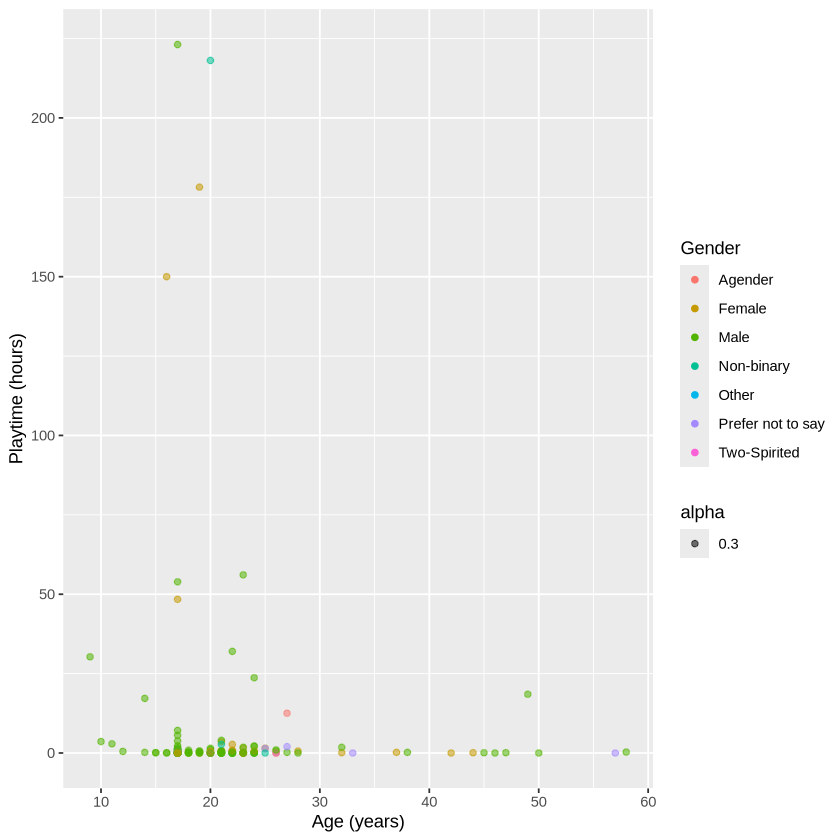

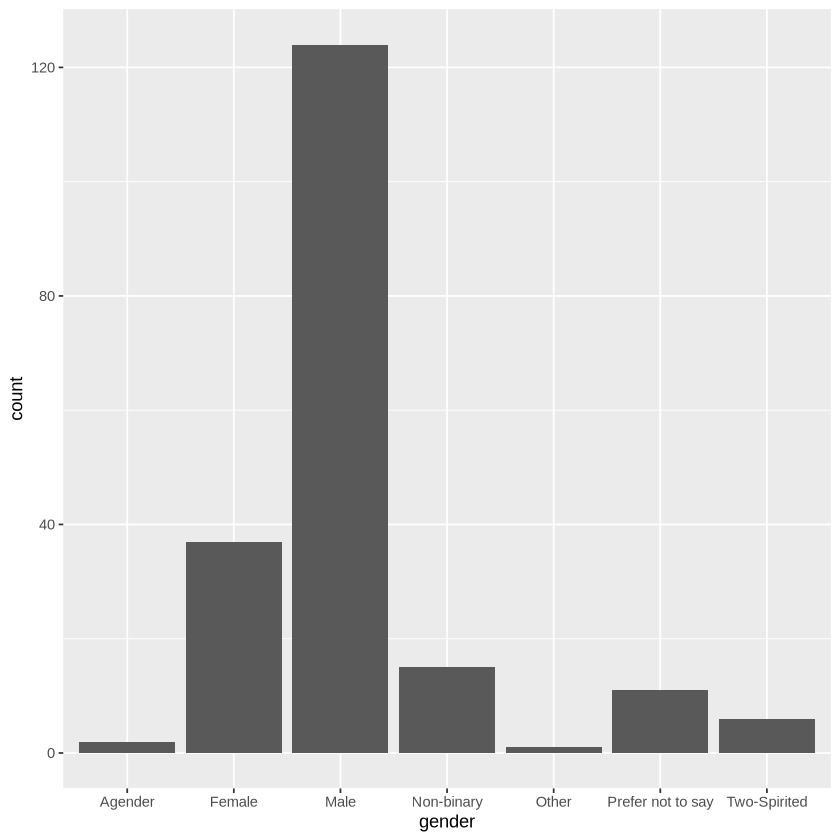

In [13]:
age_vs_playtime <- players |> ggplot(aes(x = Age, y = played_hours, color = gender, alpha = 0.3)) + geom_point() + labs(x = "Age (years)", y = "Playtime (hours)", color = "Gender")
gender_players <- players |> ggplot(aes(x = gender)) + geom_bar() 
age_vs_playtime
gender_players



- **<font color = green>There seems to be no relationship between age and playtime visualised in the scatterplot above.</font>**
- **<font color = green>The gender with the most players seems to be male, having more players than all the other categories combined.</font>**


### Methods and Plan
A model that I think I would use for the prediction is the KNN classification model. I think this model is useful because the predictions I have to make for 
my question is a categorical one, so it's a classification problem. This is also a safe model to use because there doesn't need to be a relationship between the variables for the model to work, so I don't have to make any assumptions. Although, if there is a strong linear relationship between variables then a linear model would provide a better prediction. For this model though, I will have to use a many fold cross validation test to find the best number of neighbours. To do cross validation I would have to split the data around 80% training and 20% testing first on the player dataset and then perform the cross validation for the best K-value on the training dataset before using it on the test dataset.